In [119]:
def reverser(word):
    return(word[::-1])
        
reverser('MontyPython')

'nohtyPytnoM'

In [114]:
def bayes(a, b_given_a, b_given_not_a):
    return ((b_given_a) * a) / ((a * b_given_a) + (1 - a) * (1 - b_given_a))

#P(A | B) = P(B | A) * P(A) / [P(A)*P(B|A) + P(A~)*P(B|A~)]

bayes(.000001, .9999, .0001)

0.009900019604000295

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

baseball = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lahman-teams.csv')
baseball

#The table itself + imports

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.830,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.820,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,NaN,0.810,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,NaN,0.800,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.830,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,2015,NL,LAN,LAD,W,1,162,81.0,92,70,...,133.0,0.988,Los Angeles Dodgers,Dodger Stadium,3764815.0,101,98,LAD,LAN,LAN
2801,2015,NL,SFN,SFG,W,2,162,81.0,84,78,...,145.0,0.987,San Francisco Giants,AT&T Park,3375882.0,99,97,SFG,SFN,SFN
2802,2015,NL,ARI,ARI,W,3,162,81.0,79,83,...,146.0,0.986,Arizona Diamondbacks,Chase Field,2080145.0,107,106,ARI,ARI,ARI
2803,2015,NL,SDN,SDP,W,4,162,81.0,74,88,...,138.0,0.985,San Diego Padres,Petco Park,2459742.0,98,97,SDP,SDN,SDN


In [40]:
for col in baseball.columns: 
    print(col) 
    
#A list of the columns for my own use.

yearID
lgID
teamID
franchID
divID
Rank
G
Ghome
W
L
DivWin
WCWin
LgWin
WSWin
R
AB
H
2B
3B
HR
BB
SO
SB
CS
HBP
SF
RA
ER
ERA
CG
SHO
SV
IPouts
HA
HRA
BBA
SOA
E
DP
FP
name
park
attendance
BPF
PPF
teamIDBR
teamIDlahman45
teamIDretro


In [142]:
sb_since_1995 = (baseball['yearID'] >= 1995)
sb_data = baseball.loc[sb_since_1995.values, ['yearID', 'SB']]
sb_data_per_game = sb_data.assign(SB_per_Game = (baseball.SB / 162))
sb_data_per_game

#A new table which includes a column dividing the number of stolen bases divided by the total number of games.

,yearID,SB,SB_per_Game
2181,1995,73.0,0.450617
2182,1995,92.0,0.567901
2183,1995,99.0,0.611111
2184,1995,58.0,0.358025
2185,1995,110.0,0.679012
...,...,...,...
2800,2015,59.0,0.364198
2801,2015,93.0,0.574074
2802,2015,132.0,0.814815
2803,2015,82.0,0.506173


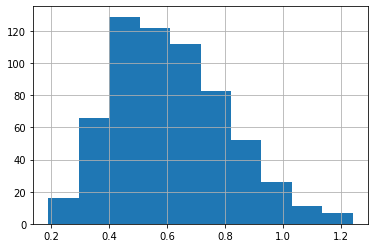

In [143]:
sb_data_per_game['SB_per_Game'].hist()
#Histograms of this new table.

In [61]:
raw_sb_data_per_game = sb_data_per_game.drop(['yearID', 'SB'], axis = 1)
#dropping the yearID + SB columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002678B34B4C8>]],
      dtype=object)

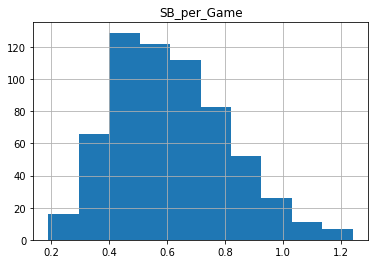

In [62]:
raw_sb_data_per_game.hist()
#The answer to #3, a histogram of just the number of stolen bases per game.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002678B3FAE48>]],
      dtype=object)

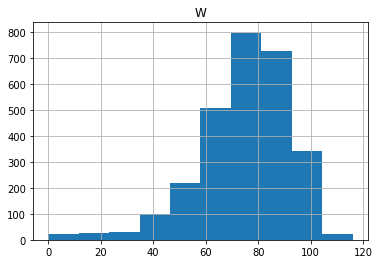

In [74]:
baseball_wins = baseball[['W']]
baseball_wins.hist()

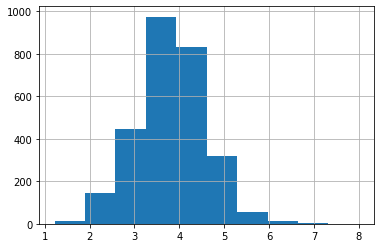

In [144]:
baseball['ERA'].hist()


SB_per_game follows a skewed distribution. The data for wins follows a skewed binomial distribution. The data for ERA follows a relatively normal distribution. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002678B7D4CC8>]],
      dtype=object)

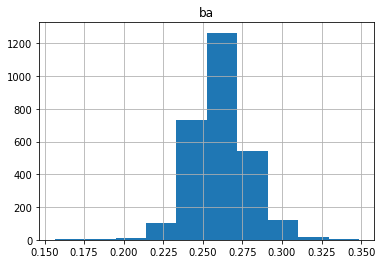

In [98]:
team_ba = baseball.assign(ba = (baseball.H / baseball.AB))
team_ba.head()
BA = team_ba[['ba']]
BA.hist()

In [97]:
BA.describe()

,ba
count,2805.000000
mean,0.261449
std,0.017900
min,0.156398
25%,0.250092
50%,0.260746
75%,0.271554
max,0.348701


This is a histogram plotting team batting averages over the entirety of baseball's history. Beneath it is a description of the basic statistics regarding it. For example, a team has never hit above a .349 batting average in the sport's history!


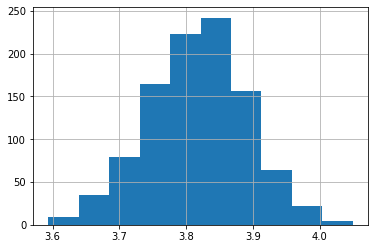

In [174]:
list_of_results = []
for i in range(1000):
    list_of_results.append(baseball['ERA'].sample(n=100).mean())

pd.Series(list_of_results).hist()

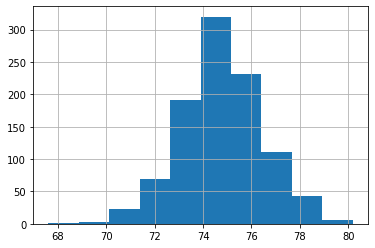

In [175]:
list_of_results2 = []
for i in range(1000):
    list_of_results2.append(baseball['W'].sample(n=100).mean())

pd.Series(list_of_results2).hist()

Both distributions are relatively normal, with W being binomial. 